## Example Notebook for Finding the Higgs boson

In [23]:
import uproot
import numpy as np
import matplotlib.pyplot as plt

gg_file_name = "../data/ATLAS/data.4lep.root"
gg_file = uproot.open(gg_file_name)

In [44]:
tree = b'mini;1'
branches = [ b'lep_pt', b'lep_eta', 
            b'lep_phi', b'lep_E',
           b'lep_isTightID',b'lep_etcone20',b'lep_type',b'lep_charge']
kins = {}
for branch in branches:
    kins[branch] = gg_file[tree].array(branch)

In [25]:
def make_fig(xTitle="xTitle",yTitle="yTitle"):
    fig = plt.figure(figsize=(15,10))

    ax = plt.gca()
    ax.set_prop_cycle(color=['#002BFF','#A15FFF','#FF0061','#FF8913'])
    ax.set_xlabel(xTitle,fontsize=26,labelpad=6)
    ax.set_ylabel(yTitle,fontsize=26)
    ax.tick_params(labelsize=18, direction='out', length=8, width=2)
    ax.yaxis.offsetText.set_fontsize(18)
    ax.xaxis.labelpad = 15
    ax.yaxis.labelpad = 15
    ax.tick_params(axis='both', which='major', labelsize=25)
    
    return fig, ax

In [26]:
# convert everything to a more numpy friendly format
vars = {}
vars[b'lep_pt']  = np.array([[x[0],x[1],x[2],x[3]] for x in kins[b'lep_pt']]) 
vars[b'lep_phi'] = np.array([[x[0],x[1],x[2],x[3]] for x in kins[b'lep_phi']])
vars[b'lep_eta'] = np.array([[x[0],x[1],x[2],x[3]] for x in kins[b'lep_eta']])
vars[b'lep_E']   = np.array([[x[0],x[1],x[2],x[3]] for x in kins[b'lep_E']])

In [27]:
GeVperMeV = 1./1000
vars[b'lep_px']     = vars[b'lep_pt']*np.cos ( vars[b'lep_phi']) * GeVperMeV
vars[b'lep_py']     = vars[b'lep_pt']*np.sin ( vars[b'lep_phi']) * GeVperMeV
vars[b'lep_pz']     = vars[b'lep_pt']*np.sinh( vars[b'lep_eta']) * GeVperMeV
vars[b'lep_E_GeV']  = vars[b'lep_E'] * GeVperMeV

In [28]:
vars[b'higgs_px'] = np.array([ np.sum(i) for i in vars[b'lep_px'] ] )
vars[b'higgs_py'] = np.array([ np.sum(i) for i in vars[b'lep_py'] ] )
vars[b'higgs_pz'] = np.array([ np.sum(i) for i in vars[b'lep_pz'] ] )
vars[b'higgs_E']  = np.array([ np.sum(i) for i in vars[b'lep_E_GeV'] ] )

In [29]:
vars[b'higgs_pt'] = np.sqrt(vars[b'higgs_px']**2+vars[b'higgs_py']**2)
vars[b'higgs_p'] = np.sqrt(vars[b'higgs_pt']**2+vars[b'higgs_pz']**2)
vars[b'higgs_m'] = np.sqrt(vars[b'higgs_E']**2 - vars[b'higgs_p']**2)

In [67]:
# Make histogram and extract bins
n, bins, patches = ax.hist(vars[b'higgs_m'], 
                           np.linspace(100,160,30),linewidth=3,
                           histtype='stepfilled',facecolor='pink',
                           edgecolor="black",linestyle='-')

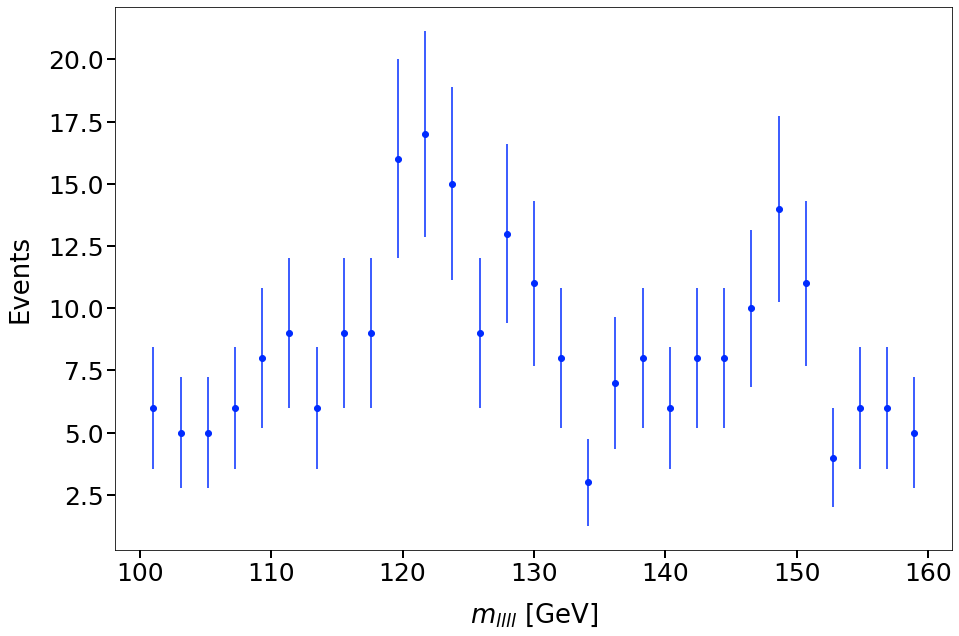

In [68]:
# Plot this as points
fig, ax = make_fig(xTitle="$m_{llll}$ [GeV]",yTitle="Events")
bins_mean = [0.5 * (bins[i] + bins[i+1]) for i in range(len(n))]
err = [np.sqrt(pt) for pt in n]

plot = plt.errorbar(bins_mean, n,yerr=err,fmt="o")

## Let's make this better
- What other cuts can we apply to make this better?
- Well we know that the Higgs is neutral

In [49]:
good_higgs_indices = []
# apply pT cuts
for index in range(len(kins[b'lep_pt'])):
        if np.sum(kins[b'lep_charge'][index]) != 0:
            continue
        elif (np.sum(kins[b'lep_type'][index]) != 44 and 
              np.sum(kins[b'lep_type'][index]) != 48 and 
              np.sum(kins[b'lep_type'][index]) != 52):
            continue
        good_higgs_indices.append(index)
print("Efficiency of cut: {:.3}".format(len(good_higgs_indices)/len(kins[b'lep_isTightID'])))
good_evt = {}
good_higgs_indices = np.array(good_higgs_indices)

Efficiency of cut: 0.608


In [53]:
nice_good_evt = {}
nice_good_evt[b'higgs_m'] = np.take(vars[b'higgs_m'],good_higgs_indices)

In [77]:
# Make histogram and extract bins
n2, bins2, patches2 = ax.hist(nice_good_evt[b'higgs_m'], 
                           np.linspace(100,160,30),linewidth=3,
                           histtype='stepfilled',facecolor='pink',
                           edgecolor="black",linestyle='-')

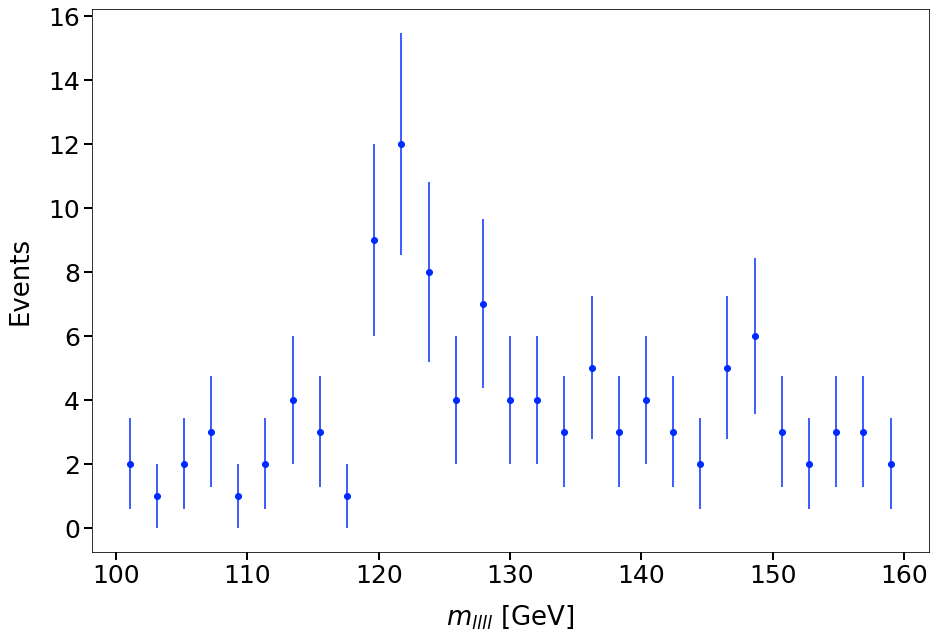

In [78]:
# Plot this as points
fig, ax = make_fig(xTitle="$m_{llll}$ [GeV]",yTitle="Events")
bins_mean2 = [0.5 * (bins2[i] + bins2[i+1]) for i in range(len(n2))]
err2 = [np.sqrt(pt) for pt in n2]

cutplot = plt.errorbar(bins_mean2, n2,yerr=err2,fmt="o")

- This is a tiny peak!

### What about no cuts?

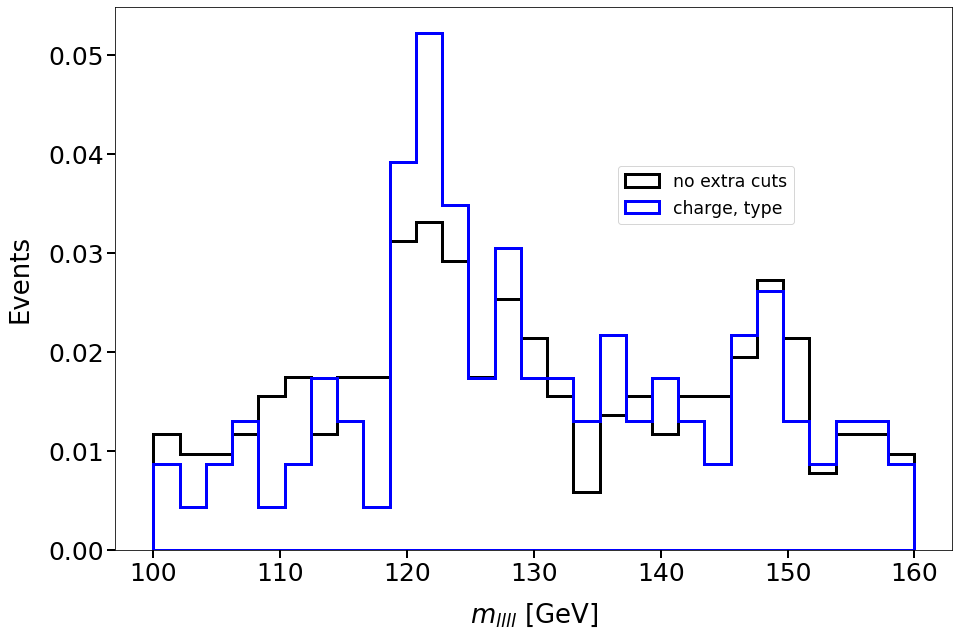

In [83]:
xtitle  = "$m_{llll}$ [GeV]"
ytitle  = "Events"
fig, ax = make_fig(xTitle=xtitle,yTitle=ytitle)
nbins   = 30 # number of bins in histogram
xlow    = 100
xhigh   = 160
xbins    = np.linspace(xlow, xhigh,nbins)
n, bins, patches    = ax.hist(vars[b'higgs_m'], xbins, linewidth=3,histtype='stepfilled',facecolor='none',edgecolor="black",linestyle='-', label="no extra cuts",density=True)
n, bins, patches    = ax.hist(nice_good_evt[b'higgs_m'], xbins, linewidth=3,histtype='stepfilled',facecolor='none',edgecolor="blue",linestyle='-', label="charge, type",density=True)
plt.legend(loc=(0.6,0.6),fontsize="xx-large")